### 폐병 환자 수술 (Thoraric Surgery)

In [5]:
import numpy as np 
import pandas as pd

In [6]:
df = pd.read_csv('dataset/ThoraricSurgery.csv', header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,293,1,3.80,2.80,0,0,0,0,0,0,12,0,0,0,1,0,62,0
1,1,2,2.88,2.16,1,0,0,0,1,1,14,0,0,0,1,0,60,0
2,8,2,3.19,2.50,1,0,0,0,1,0,11,0,0,1,1,0,66,1
3,14,2,3.98,3.06,2,0,0,0,1,1,14,0,0,0,1,0,80,1
4,17,2,2.21,1.88,0,0,1,0,0,0,12,0,0,0,1,0,56,0


### 데이터 셋 만들기

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:,:-1].values, df.iloc[:,-1].values,
    stratify=df.iloc[:,-1].values, random_state=2021
)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((352, 17), (118, 17), (352,), (118,))

### 모델 정의

In [8]:
import tensorflow as tf 
seed = 2021
np.random.seed(seed)
tf.random.set_seed(seed)

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [10]:
model = Sequential([
    Dense(24, input_dim=17, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 24)                432       
_________________________________________________________________
dense_4 (Dense)              (None, 10)                250       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 11        
Total params: 693
Trainable params: 693
Non-trainable params: 0
_________________________________________________________________


### 모델 컴파일 - 실행환경 설정

In [11]:
model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

### 모델 학습

In [12]:
history = model.fit(
    X_train, y_train, 
    validation_split=0.2,
    epochs=30,
    batch_size=30
)

Epoch 1/30
10/10 [==============================] - 1s 18ms/step - loss: 69.8611 - accuracy: 0.1423 - val_loss: 46.2768 - val_accuracy: 0.2958
Epoch 2/30
10/10 [==============================] - 0s 3ms/step - loss: 34.4216 - accuracy: 0.2349 - val_loss: 15.4398 - val_accuracy: 0.3803
Epoch 3/30
10/10 [==============================] - 0s 3ms/step - loss: 7.3012 - accuracy: 0.5587 - val_loss: 4.0535 - val_accuracy: 0.8028
Epoch 4/30
10/10 [==============================] - 0s 3ms/step - loss: 3.4776 - accuracy: 0.8648 - val_loss: 6.0521 - val_accuracy: 0.8028
Epoch 5/30
10/10 [==============================] - 0s 3ms/step - loss: 4.1897 - accuracy: 0.8648 - val_loss: 5.8496 - val_accuracy: 0.8028
Epoch 6/30
10/10 [==============================] - 0s 3ms/step - loss: 3.8167 - accuracy: 0.8648 - val_loss: 5.0567 - val_accuracy: 0.8028
Epoch 7/30
10/10 [==============================] - 0s 3ms/step - loss: 3.1424 - accuracy: 0.8648 - val_loss: 3.8728 - val_accuracy: 0.8028
Epoch 8/30
10/1

### 정확도 평가

In [13]:
model.evaluate(X_test, y_test)

4/4 [==============================] - 0s 1ms/step - loss: 0.4638 - accuracy: 0.8305


[0.46381527185440063, 0.8305084705352783]

### 학습과정 시각화

In [14]:
type(history.history)

dict

In [15]:
# 훈련 데이터 정확도/손실값
accuracy = history.history['accuracy']
loss = history.history['loss']
accuracy[:3]

[0.1423487514257431, 0.23487544059753418, 0.5587188601493835]

In [16]:
# 검증 데이터 정확도/손실값
val_accuracy = history.history['val_accuracy']
val_loss = history.history['val_loss']
val_loss[:3]

[46.276824951171875, 15.43982982635498, 4.053508758544922]

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

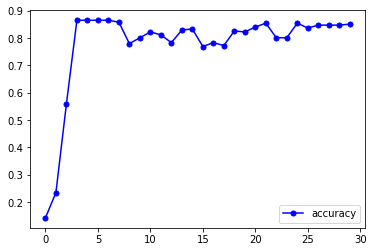

In [18]:
x_len = np.arange(len(accuracy))
#plt.figure(figsize=(12,8))
plt.plot(x_len, accuracy, 'bo-', markersize=5, label='accuracy')
#plt.plot(x_len, val_loss, 'ro-', markersize=5, label='val_loss')
plt.legend()
plt.show()

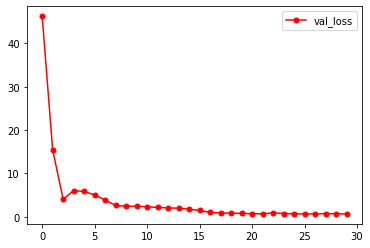

In [19]:
#plt.plot(x_len, accuracy, 'bo-', markersize=5, label='accuracy')
plt.plot(x_len, val_loss, 'ro-', markersize=5, label='val_loss')
plt.legend()
plt.show()